In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')

# Seasonality

In [3]:
m = NeuralProphet()
m.fit(df)

Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


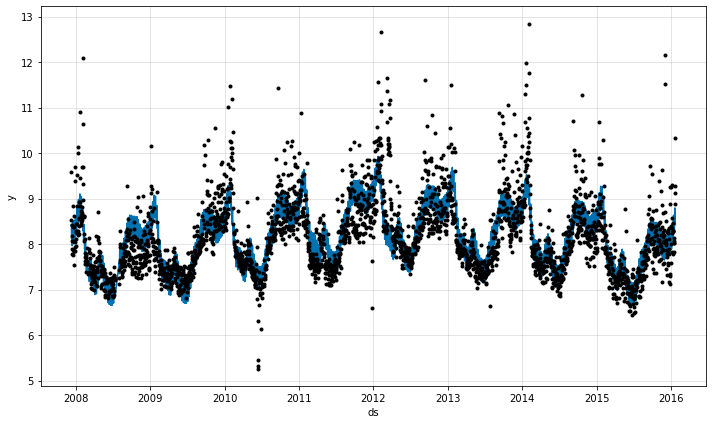

In [4]:
forecast = m.predict(future_periods=m.n_forecasts)
fig_fit = m.plot(forecast)

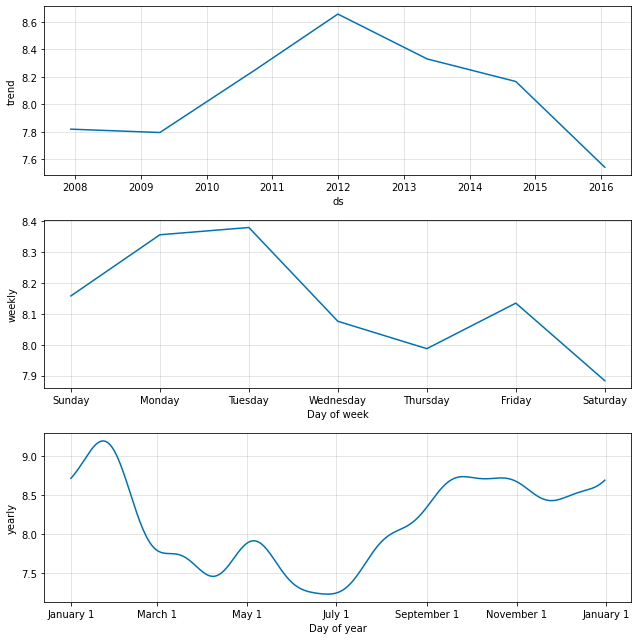

In [5]:
fig_trend = m.plot_components(forecast)

##  Underfit Seasonality

In [6]:
m = NeuralProphet(
    yearly_seasonality=2,
    weekly_seasonality=1,
    daily_seasonality=False,
)
m.fit(df)

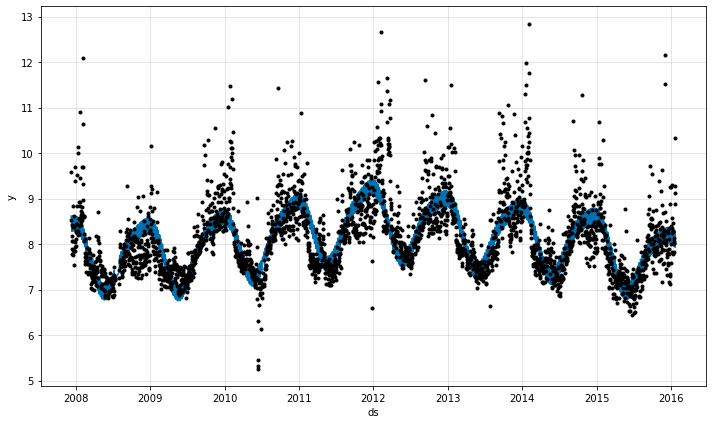

In [7]:
forecast = m.predict(future_periods=m.n_forecasts)
fig_fit = m.plot(forecast)

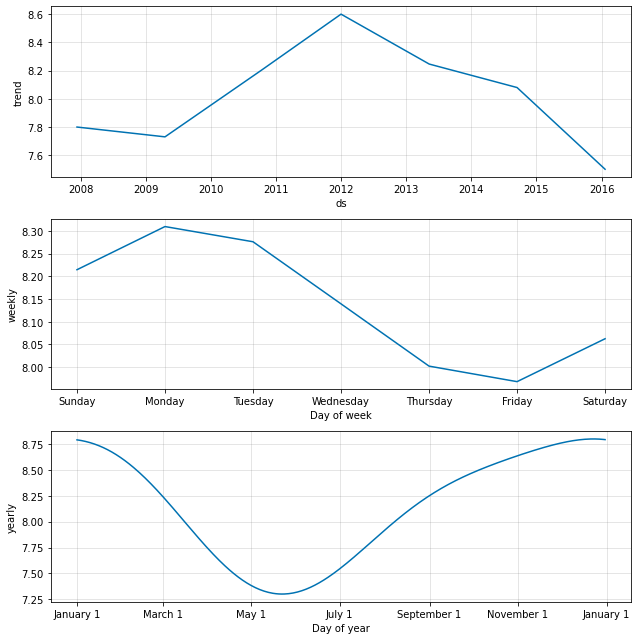

In [8]:
fig_trend = m.plot_components(forecast)

##  Overfit Seasonality

In [9]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
)
m.fit(df)

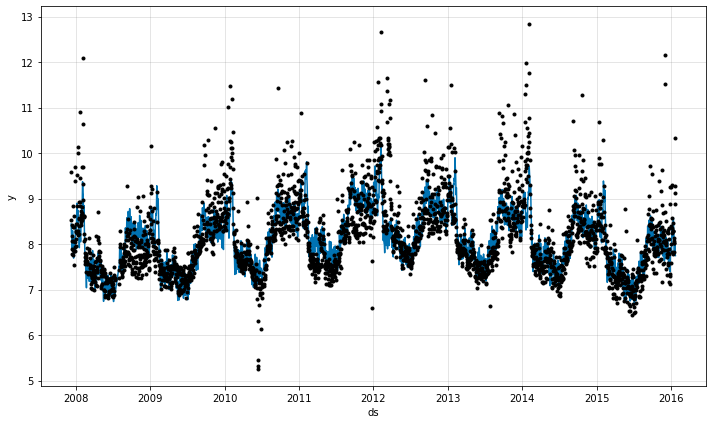

In [10]:
forecast = m.predict(future_periods=m.n_forecasts)
fig_fit = m.plot(forecast)

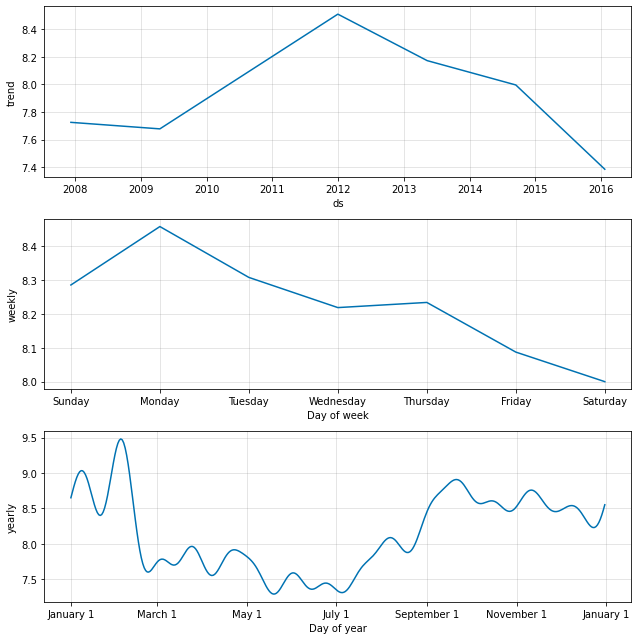

In [11]:
fig_trend = m.plot_components(forecast)